In [1]:
# Importing necessary libraries

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import Imputer
import sklearn
import pandas
import random
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Reading in file 

raw_data = pandas.read_csv('contactid_08_01_18download.csv', encoding="utf-8")
#raw_data

# This will show us (# of rows, # of columns)
raw_data.shape

(18265, 36)

In [3]:
# We only want to consider data in which the "Close" column has data, so that is the first thing we filter and we train/test on that new DataFrame

dfclean = raw_data.loc[raw_data['close'].notnull()]
#dfclean

# This will show us (# of rows, # of columns)
dfclean.shape

(2869, 36)

In [4]:
# Now we look over the workable data and see how clean it is

num_of_cells = dfclean.shape[0]*dfclean.shape[1]
num_of_cells

103284

In [5]:
# We look at all the columns with NaN values

df_null_columns = ((dfclean.isnull().sum()/dfclean.shape[0])*100).round(decimals=2).astype(str) + '%'
df_null_columns.to_frame('nulls')
df_null_columns

Subject.Id                                            0.0%
Contact.ID                                            0.0%
cat                                                   0.0%
svy_contact                                           0.0%
empstatus                                            9.27%
jailprison                                          10.46%
close                                                 0.0%
baseline_flag                                         0.0%
dup                                                   0.0%
reinstall_flag1                                       0.0%
reinstall_flag2                                       0.0%
phonesurvey                                           0.0%
Total number of calls                                 0.0%
Total duration of calls                               0.0%
Total incoming calls                                  0.0%
Total outgoing calls                                  0.0%
Total number of missed calls                          0.

In [6]:
# We also look at all the rows with at least one NaN value

df_null_rows = dfclean.isnull().sum(axis=1)
df_null_rows

2        4
17       4
24       0
28       3
33       2
36       2
46       2
52       2
61       0
67       2
68       2
76       0
87       0
88       0
99       4
101      2
103      2
106      4
107      0
113      0
114      0
116      2
119      2
120      0
121      4
123      4
125      2
126      0
127      0
128      0
        ..
18014    7
18015    7
18017    5
18038    7
18045    5
18058    7
18059    9
18062    9
18063    5
18071    7
18078    7
18095    5
18106    5
18135    9
18136    5
18144    6
18145    5
18169    9
18171    5
18174    8
18177    7
18190    7
18198    5
18205    9
18209    5
18220    8
18233    9
18237    5
18252    5
18254    5
Length: 2869, dtype: int64

In [7]:
# The percentage of rows missing at least one value would be

(((df_null_rows!=0).sum()/(df_null_rows.shape[0]))*100).round(decimals=2).astype(str) + '%'

'78.81%'

In [8]:
# And lastly we consider missing cells in relation to all total cells 

num_of_missing_cells = (dfclean.isnull().sum()).sum()
((num_of_missing_cells/num_of_cells)*100).round(decimals=2).astype(str) + '%'

'11.32%'

In [9]:
#Now we begin to train/test the data, in hopes of being able to most accurately predict the closeness column for the original file

In [10]:
# We begin by looking at 2 different introductory Models that helps us visualize the data
#GradientBoostingClassifier
#GradientBoostingRegressor
# Before we begin with these Models, we need to format the data in a manner in which we can work with
dfcleanX = dfclean.fillna(-1)
dfcleanX

,Subject.Id,Contact.ID,cat,svy_contact,empstatus,jailprison,close,baseline_flag,dup,reinstall_flag1,...,Number of outgoing calls at night,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts
2,1003,a0000022d8b566-682408058,Phone survey,Person,Working Formally,0.0,60.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,4.0,0.0,0.0,-1.0,-1.0
17,1004,a0000022aa5cd6-212065659,Phone survey,Person,Working Formally,0.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.0,-1.0,2.0,0.0,0.0,-1.0,-1.0
24,1004,a0000022aa5cd61447330108,Phone survey,Person,Not Working,0.0,100.0,0.0,1.0,1.0,...,4.0,1.0,1.0,2.0,2.0,14.0,1.0,12.0,1.0,4.0
28,1004,a0000022aa5cd62103159229,Phone survey,Person,-1,1.0,55.0,0.0,0.0,1.0,...,5.0,0.0,1.0,1.0,3.0,2.0,1.0,2.0,-1.0,-1.0
33,1004,a0000022aa5cd6846559228,Phone survey,Person,Working Informally,1.0,100.0,0.0,1.0,1.0,...,11.0,1.0,1.0,1.0,7.0,7.0,1.0,2.0,-1.0,-1.0
36,1004,a0000022d95d9b-1043125280,Phone survey,Person,Not Working,0.0,100.0,0.0,1.0,1.0,...,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,-1.0,-1.0
46,1004,a0000022d95d9b-879869607,Phone survey,Person,Self-employed,0.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.0,-1.0,3.0,1.0,1.0,34.0,34.0
52,1004,a0000022d95d9b17610566,Phone survey,Person,Not Working,0.0,100.0,0.0,0.0,1.0,...,3.0,0.0,1.0,-1.0,-1.0,3.0,1.0,1.0,5.0,5.0
61,1004,a0000022d95d9b846559228,Phone survey,Person,Working Informally,1.0,100.0,0.0,0.0,1.0,...,9.0,1.0,1.0,1.0,15.0,5.0,1.0,2.0,2.0,33.0
67,1005,a0000022aa2754-765626467,Phone survey,Person,Working Formally,1.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,7.0,1.0,0.0,0.0,-1.0,-1.0


In [11]:
# We filter out the specific columns we are interested in

xdata = dfcleanX[['Total number of calls',
'Total duration of calls',
'Total incoming calls',
'Total outgoing calls',
'Total number of missed calls',
'Total number of incoming calls, excluding missed',
'Proportion of incoming calls answered',
'Proportion of calls incoming',
'Duration of incoming calls',
'Duration of outgoing calls',
'Total number of night calls',
'Any night call',
'Number of incoming calls at night',
'Number of outgoing calls at night',
'Any night incoming call',
'Any night outgoing call',
'Min days between calls',
'Max days between calls',
'Total number of texts',
'Any night text',
'Number of texts at night',
'Min days between texts',
'Max days between texts']].values 

In [12]:
# We implement a random 80/20 split of the data to be used for train/test

random.seed = 0
indices = np.array(range(2869))
random.shuffle(indices)
num_train = int(len(indices)*0.8)
train_indices = indices[:num_train]
test_indices =indices[num_train+1:]

# namimg variables that will be used for training/testing
xtrain = xdata[train_indices]
xtest = xdata[test_indices]

# ravel creates 1d array
y = dfclean[['close']].values.ravel()
ytrain = y[train_indices]
ytest = y[test_indices]

In [13]:
# GradientBoostingClassifier

def transform(ytrain):
    if ytrain < 20:
        return 0
    if ytrain < 40:
        return 1
    if ytrain < 60:
        return 2
    if ytrain < 80:
        return 3
    if ytrain < 100:
        return 4
    return 5


ytrainClassifier = [transform(i) for i in ytrain]
ytestClassifier = [transform(i) for i in ytest]
# ytestClassifier
# xtrain.shape,ytrain.shape

In [14]:
GBclassifier = GradientBoostingClassifier().fit(xtrain,ytrainClassifier)

yhatClassifier = GBclassifier.predict(xtrain)
yhatClassifier

array([3, 5, 5, ..., 5, 5, 5])

In [15]:
yhatClassifier = GBclassifier.predict(xtest)
accuracy_score(ytestClassifier, yhatClassifier)

0.45898778359511344

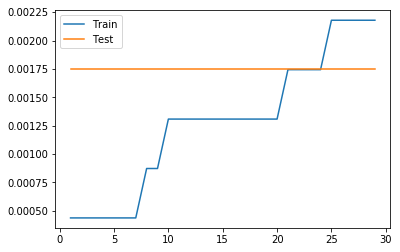

In [16]:
n_estimators = []
train_err = []
test_err = []

for n_estimator in range(1,30): #[1,2,3,4,5,10,20,50]:
    GBclassifier = GradientBoostingClassifier(n_estimators=n_estimator).fit(xtrain,ytrainClassifier)
    yhatClassifier = GBclassifier.predict(xtrain)
    n_estimators.append(n_estimator)
    train_err.append(accuracy_score(ytrain, yhatClassifier))
    test_err.append(accuracy_score(ytest, GBclassifier.predict(xtest)))
    
plt.plot(n_estimators, train_err, label="Train")
plt.plot(n_estimators, test_err, label="Test")
plt.legend()

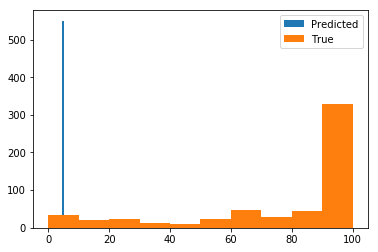

In [17]:
GBclassifier = GradientBoostingClassifier(n_estimators=20).fit(xtrain,ytrainClassifier)
plt.hist(GBclassifier.predict(xtest), label="Predicted")
plt.hist(ytest, label="True")
plt.legend()

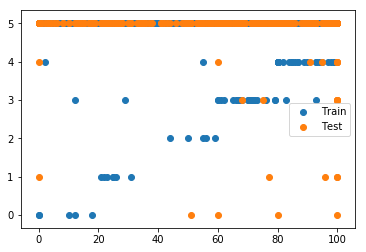

In [18]:
plt.scatter(ytrain, GBclassifier.predict(xtrain), label="Train")
plt.scatter(ytest, GBclassifier.predict(xtest), label="Test")
plt.legend()

In [19]:
# debugging
xtrain

array([[ 5.700e+01,  3.067e+03,  2.600e+01, ...,  1.300e+01,  1.000e+00,
         1.200e+01],
       [ 1.800e+01,  2.028e+03,  9.000e+00, ...,  3.000e+00,  1.000e+00,
         4.000e+00],
       [ 4.000e+00,  1.880e+02,  2.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       ...,
       [ 2.000e+00,  2.522e+03,  1.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 5.400e+01,  4.144e+03,  3.600e+01, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 2.700e+01,  6.559e+03,  7.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00]])

In [20]:
# GradientBoostingRegressor

In [21]:
GBregressor = GradientBoostingRegressor().fit(xtrain,ytrain)
yhatRegressor = GBregressor.predict(xtrain)
yhatRegressor

array([86.42108238, 77.5488107 , 82.68558001, ..., 66.64012776,
       79.51678536, 92.49051277])

In [22]:
yhatRegressor = GBregressor.predict(xtest)
mean_squared_error(ytest, yhatRegressor)

1010.4227567722036

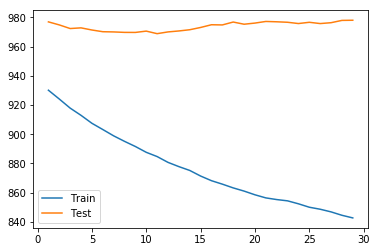

In [23]:
n_estimators = []
train_err = []
test_err = []

for n_estimator in range(1,30): #[1,2,3,4,5,10,20,50]:
    GBregressor = GradientBoostingRegressor(n_estimators=n_estimator).fit(xtrain,ytrain)
    yhatRegressor = GBregressor.predict(xtrain)
    n_estimators.append(n_estimator)
    train_err.append(mean_squared_error(ytrain, yhatRegressor))
    test_err.append(mean_squared_error(ytest, GBregressor.predict(xtest)))
    
plt.plot(n_estimators, train_err, label="Train")
plt.plot(n_estimators, test_err, label="Test")
plt.legend()

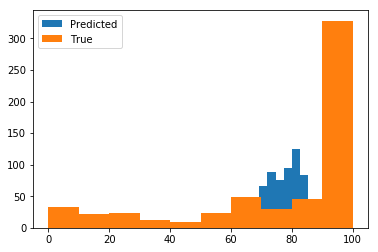

In [24]:
GBregressor = GradientBoostingRegressor(n_estimators=25).fit(xtrain,ytrain)
plt.hist(GBregressor.predict(xtest), label="Predicted")
plt.hist(ytest, label="True")
plt.legend()

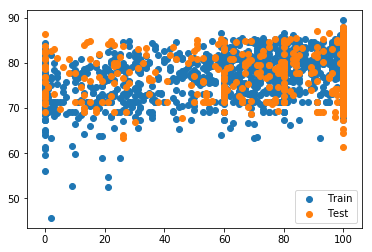

In [25]:
plt.scatter(ytrain, GBregressor.predict(xtrain), label="Train")
plt.scatter(ytest, GBregressor.predict(xtest), label="Test")
plt.legend()

In [26]:
# We finally look at 2 different Advanced Models that helps us visualize the data
# SVR
# MLPRegressor
# Before we begin with these Models, we need to format the data in a manner in which we can work with

In [27]:
# Imputer and formatting data
# Before we begin with these Models, we need to format the data in a manner in which we can work with, but this time, is a smarter manner using an Imputer to populate missing values for us

dfRawFilled = pandas.DataFrame(data=xdata)

imp = Imputer()
imp.fit(dfRawFilled)
imp.transform(dfRawFilled.values)
dfRawFilled = pandas.DataFrame(data=(imp.transform(dfRawFilled.values)))
dfRawFilled

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,5.0,85.0,3.0,2.0,1.0,2.0,0.666667,0.600000,29.0,56.0,...,0.0,0.0,0.0,-1.0,-1.0,4.0,0.0,0.0,-1.0,-1.0
1,1.0,25.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,25.0,...,0.0,0.0,0.0,-1.0,-1.0,2.0,0.0,0.0,-1.0,-1.0
2,6.0,261.0,2.0,4.0,0.0,2.0,1.000000,0.333333,119.0,142.0,...,4.0,1.0,1.0,2.0,2.0,14.0,1.0,12.0,1.0,4.0
3,5.0,94.0,0.0,5.0,0.0,0.0,0.000000,0.000000,0.0,94.0,...,5.0,0.0,1.0,1.0,3.0,2.0,1.0,2.0,-1.0,-1.0
4,27.0,2261.0,11.0,16.0,0.0,11.0,1.000000,0.407407,991.0,1270.0,...,11.0,1.0,1.0,1.0,7.0,7.0,1.0,2.0,-1.0,-1.0
5,2.0,114.0,0.0,2.0,0.0,0.0,0.000000,0.000000,0.0,114.0,...,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,-1.0,-1.0
6,3.0,149.0,0.0,3.0,0.0,0.0,0.000000,0.000000,0.0,149.0,...,0.0,0.0,0.0,-1.0,-1.0,3.0,1.0,1.0,34.0,34.0
7,3.0,94.0,0.0,3.0,0.0,0.0,0.000000,0.000000,0.0,94.0,...,3.0,0.0,1.0,-1.0,-1.0,3.0,1.0,1.0,5.0,5.0
8,18.0,956.0,8.0,10.0,2.0,6.0,0.750000,0.444444,712.0,244.0,...,9.0,1.0,1.0,1.0,15.0,5.0,1.0,2.0,2.0,33.0
9,3.0,391.0,2.0,1.0,1.0,1.0,0.500000,0.666667,240.0,151.0,...,0.0,0.0,0.0,7.0,7.0,1.0,0.0,0.0,-1.0,-1.0


In [28]:
# SVR

In [29]:
# MLPRegressor

In [30]:
# We filter out the specific columns we are interested in

xdatafull = raw_data[['Total number of calls',
'Total duration of calls',
'Total incoming calls',
'Total outgoing calls',
'Total number of missed calls',
'Total number of incoming calls, excluding missed',
'Proportion of incoming calls answered',
'Proportion of calls incoming',
'Duration of incoming calls',
'Duration of outgoing calls',
'Total number of night calls',
'Any night call',
'Number of incoming calls at night',
'Number of outgoing calls at night',
'Any night incoming call',
'Any night outgoing call',
'Min days between calls',
'Max days between calls',
'Total number of texts',
'Any night text',
'Number of texts at night',
'Min days between texts',
'Max days between texts']].values

In [31]:
dfRawFilledFull = pandas.DataFrame(data=xdatafull)

In [32]:
imp = Imputer()
imp.fit(dfRawFilledFull)
imp.transform(dfRawFilledFull.values)
dfRawFilledFull = pandas.DataFrame(data=(imp.transform(dfRawFilledFull.values)))
dfRawFilledFull

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,1190.749812,...,3.146068,0.253712,0.440573,4.717154,13.830781,32.000000,1.00000,17.000000,1.000000,4.000000
1,35.00000,992.000000,10.000000,25.000000,7.000000,3.00000,0.300000,0.285714,95.00000,897.000000,...,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.064367,12.305848
2,5.00000,85.000000,3.000000,2.000000,1.000000,2.00000,0.666667,0.600000,29.00000,56.000000,...,0.000000,0.000000,0.000000,4.717154,13.830781,4.000000,0.00000,0.000000,4.064367,12.305848
3,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,1190.749812,...,3.146068,0.253712,0.440573,4.717154,13.830781,1.000000,1.00000,1.000000,4.064367,12.305848
4,2.00000,64.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.500000,0.00000,64.000000,...,1.000000,1.000000,1.000000,4.717154,13.830781,5.000000,1.00000,1.000000,2.000000,3.000000
5,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,1190.749812,...,3.146068,0.253712,0.440573,4.717154,13.830781,1.000000,1.00000,1.000000,4.064367,12.305848
6,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,1190.749812,...,3.146068,0.253712,0.440573,4.717154,13.830781,302.000000,1.00000,128.000000,1.000000,1.000000
7,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,1190.749812,...,3.146068,0.253712,0.440573,4.717154,13.830781,1.000000,0.00000,0.000000,4.064367,12.305848
8,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,1190.749812,...,3.146068,0.253712,0.440573,4.717154,13.830781,16.000000,1.00000,3.000000,1.000000,1.000000
9,2.00000,80.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.00000,80.000000,...,2.000000,0.000000,1.000000,4.717154,13.830781,266.000000,1.00000,54.000000,1.000000,2.000000


In [33]:
# update x to use values that have been populated now
xdatafullColumns = dfRawFilledFull[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values

In [34]:
# debugging
xdatafullColumns

array([[1.37334604e+01, 2.02083440e+03, 4.97128330e+00, ...,
        1.70000000e+01, 1.00000000e+00, 4.00000000e+00],
       [3.50000000e+01, 9.92000000e+02, 1.00000000e+01, ...,
        1.00000000e+00, 4.06436685e+00, 1.23058477e+01],
       [5.00000000e+00, 8.50000000e+01, 3.00000000e+00, ...,
        0.00000000e+00, 4.06436685e+00, 1.23058477e+01],
       ...,
       [4.70000000e+01, 3.45900000e+03, 1.00000000e+01, ...,
        1.18259878e+01, 4.06436685e+00, 1.23058477e+01],
       [1.00000000e+00, 2.90000000e+01, 0.00000000e+00, ...,
        1.18259878e+01, 4.06436685e+00, 1.23058477e+01],
       [1.00000000e+00, 9.20000000e+01, 0.00000000e+00, ...,
        1.18259878e+01, 4.06436685e+00, 1.23058477e+01]])

In [35]:
GBregressor = GradientBoostingRegressor().fit(xtrain,ytrain)
yhatRegressor = GBregressor.predict(xdatafullColumns)
yhatRegressor
# Do one last final predict on best results and feed out 
raw_data['Predicted Closeness'] = yhatRegressor
raw_data

,Subject.Id,Contact.ID,cat,svy_contact,empstatus,jailprison,close,baseline_flag,dup,reinstall_flag1,...,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts,Predicted Closeness
0,1003,a0000022d8b566-1485854260,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32.0,1.0,17.0,1.0,4.0,69.451872
1,1003,a0000022d8b566-4428755,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,82.414769
2,1003,a0000022d8b566-682408058,Phone survey,Person,Working Formally,0.0,60.0,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,4.0,0.0,0.0,NaN,NaN,73.686994
3,1003,a0000022d8b5661085053215,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,75.460238
4,1003,a0000022d8b5661306093745,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,1.0,NaN,NaN,5.0,1.0,1.0,2.0,3.0,69.812204
5,1003,a0000022d8b5661374658182,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,75.460238
6,1003,a0000022d8b5662119192337,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,302.0,1.0,128.0,1.0,1.0,62.956200
7,1003,a0000022d8b5662120103081,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,75.460238
8,1003,a0000022d8b566439263804,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.0,1.0,3.0,1.0,1.0,69.548627
9,1003,a0000022d8b566691081474,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,1.0,NaN,NaN,266.0,1.0,54.0,1.0,2.0,71.533590


In [36]:
# Finally we write out the new dataFrame with the "Predicted Closeness" column

dfRaw = dfRaw.to_csv('contactid_08_01_18Predictions.csv', encoding="utf-8")

NameError: name 'dfRaw' is not defined